# 线性回归
应用：预测问题（prediction）
特点：自变量x 和 因变量y 是线性关系
y:label target
x:feature covariate (常是一个向量 有多个特征
样本数:n
w:weight 权重 系数
b:bias偏置 offset偏移量 intercept截距
加权是 线性变换 偏置是平移

# 预测值：
𝐲̂ =𝐗𝐰+𝑏
𝐗的每一行是一个样本，每一列是一种特征

# 损失函数
平方误差函数
$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.$$

（remember that 𝑦̂ is a line)



整个训练集 𝑛个样本上的损失均值（优势也算sum）
$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

目标 寻找 𝐰∗,𝑏∗=argmin 𝐿(𝐰,𝑏). 
argument of the minimum
线性回归有
### 解析解（analytical solution）
（可以用一个公式简单地表达出来）
𝐰∗=(𝐗⊤𝐗)^-1 𝐗⊤𝐲.

但大多数时候 没有解析解 
此时常用: 

# 梯度下降（gradient descent）
不断地在损失函数递减的方向上更新参数来降低误差
小批量随机梯度下降：每次需要计算更新的时候随机抽取一小批样本，而非遍历整个数据集
计算梯度乘以一个预先确定的正数 𝜂， 并从当前参数的值中减掉。
$$\begin{aligned} \mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}$$



$|\mathcal{B}|$表示每个小批量中的样本数，这也称为批量大小（batch size）。  𝜂 表示学习率（learning rate）。 批量大小和学习率的值通常是手动预先指定，而不是通过模型训练得到的。 这些可以调整但不在训练过程中更新的参数称为超参数（hyperparameter）。 调参（hyperparameter tuning）是选择超参数的过程。

找到一组参数，这组参数能够在我们从未见过的数据上实现较低的损失， 这一挑战被称为泛化（generalization）

# 矢量化加速
利用线性代数库运算会大大加速

In [17]:
#内嵌显示 Matplotlib 图表 直接显示在 Notebook 的单元格输出中
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l


In [18]:
#定义一个计时器 比较对向量相加的两种方法
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()
    
    
n = 10000
a = torch.ones([n])
b = torch.ones([n])
c = torch.zeros(n)

# for循环，每次执行一位的加法
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'



'0.22001 sec'

In [19]:
# 使用重载的+运算符来计算按元素的和
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00066 sec'

# 正态分布与平方损失
正态分布（normal distribution），也称为高斯分布（Gaussian distribution
若随机变量$x$具有均值$\mu$和方差$\sigma^2$（$  \sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2 $）（标准差$\sigma$），其正态分布概率密度函数如下：
$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right).$$

In [20]:
#定义一个Python函数来计算正态分布
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

# ?可视化

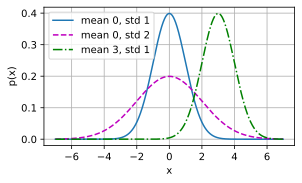

In [21]:
# 用numpy进行可视化
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

## 为什么 线性回归要用 均方 损失函数？？？

# 线性回归的神经网络

线性回归模型视为仅由单个人工神经元组成的神经网络，或称为单层神经网络
计算层数时不考虑输入层（就像信号分子不进入神经元只是和突触接触）
每个输入都与每个输出（在本例中只有一个输出）相连， 我们将这种变换（ 图3.1.2中的输出层） 称为全连接层（fully-connected layer）或称为稠密层

# 用tensor和自动求导 实现regression

In [22]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l


## 生成数据集
（用random）
2feature的样本 1000个
$\mathbf{w} = [2, -3.4]^\top$、$b = 4.2$
$$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon.$$
**)
$\epsilon$服从均值为0的正态分布

In [23]:
def synthetic_data(w,b,num_examples):
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    #生成一个服从正态分布（高斯分布）的张量
    # mean 是均值，std 是标准差，size 是张量的形状
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)#加噪声
    return X, y.reshape((-1, 1)) #将一维张量 y 变成一个具有单列的二维张量

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

## 随机读取小批量数据集
batch_size是每次小批量的样本量

In [24]:
def data_iter(batch_size, features, labels):
    num_examples = len(features) 
    #样本数 是 x的len 行数
    indices = list(range(num_examples))
    #列表是有序的、可变的集合，可以包含任意类型的元素
    #把index取出来用random.shuffle 打乱list
    random.shuffle(indices)
    
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]) #有可能超过所以和num取个min
        yield features[batch_indices], labels[batch_indices] #吐出该次for的数据 不同与return，要继续函数
        

## 模型（预测函数 假设）

In [25]:

def linreg(X,w,b):
    return torch.matmul(X,w)+b


## cost f

In [26]:
def squared_loss(y_hat,y):
    return (y_hat - y.reshape(y_hat.shape))**2/2
#reshape to the same shape andthen culculate


## degration

In [31]:
def sgd(parameters,lr,batch_size):
    """小批量随机梯度下降"""
    #参数集合、学习速率和批量大小作为输入
    with torch.no_grad():
        for parameter in parameters:
            parameter -= lr/batch_size *parameter.grad
            parameter.grad.zero_()#使用为grad后立刻清零

#  with torch.no_grad():？

# 训练
在每次迭代中，
打乱样本 读取 小批量训练样本，
并通过我们的模型来获得一组预测。 
计算损失，在计算时，有反向传播，存储了每个参数的梯度。
最后，我们调用优化算法sgd来更新模型参数。
即：
* 初始化参数
* 重复以下训练，直到完成
    * 计算梯度$\mathbf{g} \leftarrow \partial_{(\mathbf{w},b)} \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} l(\mathbf{x}^{(i)}, y^{(i)}, \mathbf{w}, b)$
    * 更新参数$(\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \eta \mathbf{g}$

注意，在每个*迭代周期*（epoch）中，我们使用`data_iter`函数遍历整个数据集，
并将训练数据集中所有样本都使用一次（假设样本数能够被批量大小整除）。


迭代周期个数`num_epochs`和学习率`lr`都是超参数（手动预先设置） 经验值 关键

## 初始化训练数据

In [36]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)
batch_size = 10
lr = 0.03
num_epochs= 3
net = linreg #选择预测方式
loss = squared_loss #选择loss function
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)
        # 因为l形状是(batch_size,1)，而不是一个标量。
        #要 l中的所有元素被加到一起，
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        #读！损失函数是预测函数（x乘w加b）算出的预测值减l真实abel值
        print(f'epoch {epoch + 1}, loss：{float(train_l.mean()):f}')

epoch 1, loss：0.030506
epoch 2, loss：0.000114
epoch 3, loss：0.000053
